In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [47]:
df = pd.read_html(url)
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [3]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [37]:
mars_df['terrestrial_date']= pd.to_datetime(mars_df['terrestrial_date'])
mars_df['min_temp'] = mars_df['min_temp'].astype('int64')
mars_df['pressure'] = mars_df['pressure'].astype('int64')
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                     int64
pressure                     int64
dtype: object

In [38]:
#How many months exist on Mars?
count_unique_month = mars_df['month'].nunique() 
print("There are " + str(count_unique_month) + " months on Mars")

There are 12 months on Mars


In [39]:
#How many Martian days of data are in this table?
count_unique_days = mars_df['sol'].nunique() 
print("There are " + str(count_unique_days) + " Martian days of data in this table")

There are 1867 Martian days of data in this table


In [73]:
averages_temp = mars_df.groupby('month')['min_temp'].mean()
averages_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [75]:
#When is the lowest minimum temperature
print(f"The lowest minimum average temperature is {averages_temp.min()}. It occurs in month {averages_temp.argmin()+1}")

The lowest minimum average temperature is -83.30729166666667. It occurs in month 3


In [77]:
#When is the highest minimum temperature
print(f"The highest minimum average temperature is {averages_temp.max()}. It occurs in month {averages_temp.argmax()+1}")

The highest minimum average temperature is -68.38297872340425. It occurs in month 8


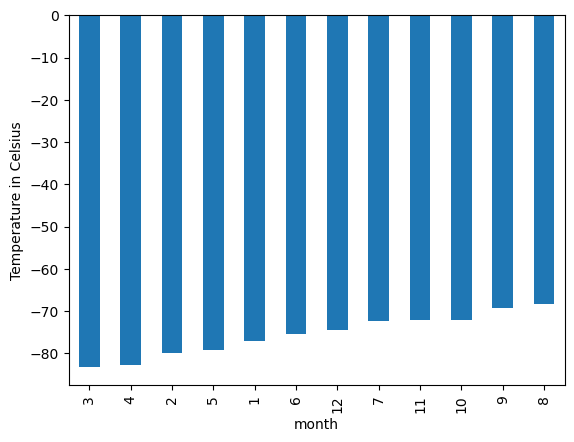

In [70]:
# Identify the coldest and hottest months in Curiosity's location
averages_temp.sort_values().plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.show()


In [78]:
averages_psi = mars_df.groupby('month')['pressure'].mean()
averages_psi

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [80]:
#When is the lowest minimum pressure
print(f"The lowest average pressure is {averages_psi.min()}. It occurs in month {averages_psi.argmin()+1}")

The lowest average pressure is 745.0544217687075. It occurs in month 6


In [81]:
#When is the highest minimum pressure
print(f"The hishest average pressure is {averages_psi.max()}. It occurs in month {averages_psi.argmax()+1}")

The hishest average pressure is 913.3059701492538. It occurs in month 9


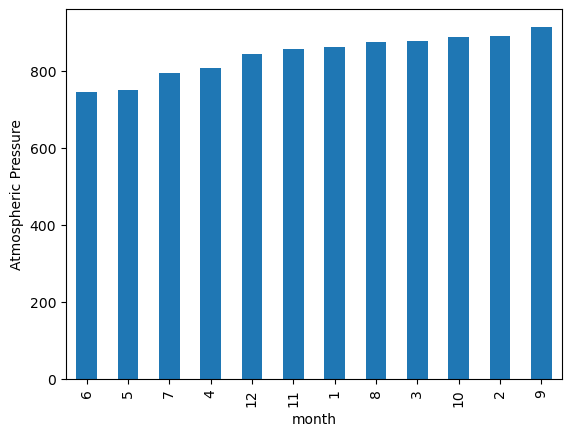

In [82]:
# Identify the coldest and hottest months in Curiosity's location
averages_psi.sort_values().plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.show()

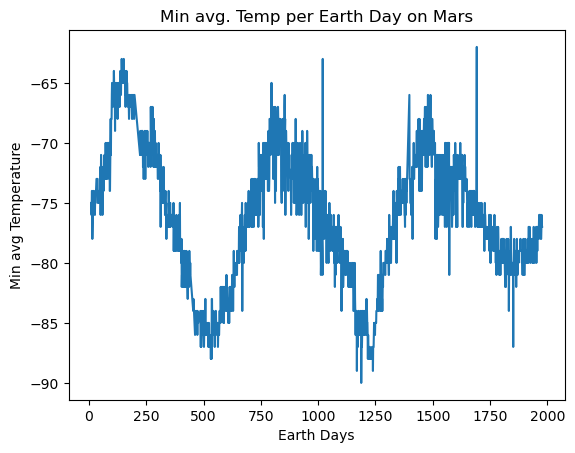

In [89]:
#Plot daily temps to estimate how many earth days in martian year
x = mars_df['sol']
y = mars_df['min_temp']

plt.plot(x,y)
plt.ylabel("Min avg Temperature")
plt.xlabel("Earth Days")
plt.title("Min avg. Temp per Earth Day on Mars")
plt.show()

#Approx. 650 days in martian year (min to min / max to max)

In [91]:
#Export dataframe to CSV
mars_df.to_csv(r'C:\Users\ldver\Desktop\Bootcamp Modules\Class\Web Scraping\mars.csv')